In [1]:
#Austin Animal Shelter Analysis.

In [2]:
#Import relevant modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Read in the data

train = 'train.csv'
test = 'test.csv'

train = pd.read_csv(train)
test = pd.read_csv(test)

train.info()
test.info()

print("The percentage of training data is " + str(train['AnimalID'].count() / (test['ID'].count() + train['AnimalID'].count())))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
AnimalID          26729 non-null object
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(10)
memory usage: 2.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11456 entries, 0 to 11455
Data columns (total 8 columns):
ID                11456 non-null int64
Name              8231 non-null object
DateTime          11456 non-null object
AnimalType        11456 non-null object
SexuponOutcome    11456 non-null object
AgeuponOutcome    11450 non-null object
Breed             11456 non-null object
Color             11456 non-null object
dtypes: int64(1), object

In [4]:
#Are the columns of both data sets the same?
#We see that the test data set has a different column, Outcome subtype. If we do not have this for our test data then it will be not
#Be useful for machine learning. Lets drop this and also rename the 'ID' column so that it matches the training data.

train = train.drop(columns='OutcomeSubtype')
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 9 columns):
AnimalID          26729 non-null object
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(9)
memory usage: 1.8+ MB


In [5]:
test = test.rename(columns = {'ID':'AnimalID'})
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11456 entries, 0 to 11455
Data columns (total 8 columns):
AnimalID          11456 non-null int64
Name              8231 non-null object
DateTime          11456 non-null object
AnimalType        11456 non-null object
SexuponOutcome    11456 non-null object
AgeuponOutcome    11450 non-null object
Breed             11456 non-null object
Color             11456 non-null object
dtypes: int64(1), object(7)
memory usage: 716.1+ KB


In [6]:
#Lets view the number of missing values per variable. This should show what rows we should be able to drop without losing signal.
train_cols = ['AnimalID','Name','DateTime','AnimalType','SexuponOutcome','AgeuponOutcome','Breed','Color']

perc_of_missing = []

for x in train_cols:
    perc = train[x].count() / train['AnimalID'].count()
    perc_of_missing.append(perc)
    
    
print(perc_of_missing)

[1.0, 0.71226009203486851, 1.0, 1.0, 0.99996258745183131, 0.99932657413296422, 1.0, 1.0]


In [7]:
train = train.dropna(axis=0,subset=['SexuponOutcome','AgeuponOutcome'])


perc_of_missing1 = []

for x in train_cols:
    perc = train[x].count() / train['AnimalID'].count()
    perc_of_missing1.append(perc)
    
    
print(perc_of_missing1)


[1.0, 0.71272931486334701, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [8]:
#Now we need to do the same for the test data.

test_cols = ['AnimalID','Name','DateTime','AnimalType','SexuponOutcome','AgeuponOutcome','Breed','Color']

perc_of_missing2 = []

for x in test_cols:
    perc = test[x].count() / test['AnimalID'].count()
    perc_of_missing2.append(perc)
    
    
print(perc_of_missing2)


[1.0, 0.71848812849162014, 1.0, 1.0, 1.0, 0.99947625698324027, 1.0, 1.0]


In [9]:
#Lets inspect 'Ageuponoutcome' and fill appropriately

test['AgeuponOutcome'].value_counts()

#Lets change the test data to the mode for this variable.

test['AgeuponOutcome'].fillna('1 year',inplace = True)

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11456 entries, 0 to 11455
Data columns (total 8 columns):
AnimalID          11456 non-null int64
Name              8231 non-null object
DateTime          11456 non-null object
AnimalType        11456 non-null object
SexuponOutcome    11456 non-null object
AgeuponOutcome    11456 non-null object
Breed             11456 non-null object
Color             11456 non-null object
dtypes: int64(1), object(7)
memory usage: 716.1+ KB


In [10]:
#Overall split of the data is around 70% training and 30% test
print(train.head())
print(train.columns)


  AnimalID     Name             DateTime      OutcomeType AnimalType  \
0  A671945  Hambone  2014-02-12 18:22:00  Return_to_owner        Dog   
1  A656520    Emily  2013-10-13 12:44:00       Euthanasia        Cat   
2  A686464   Pearce  2015-01-31 12:28:00         Adoption        Dog   
3  A683430      NaN  2014-07-11 19:09:00         Transfer        Cat   
4  A667013      NaN  2013-11-15 12:52:00         Transfer        Dog   

  SexuponOutcome AgeuponOutcome                        Breed        Color  
0  Neutered Male         1 year        Shetland Sheepdog Mix  Brown/White  
1  Spayed Female         1 year       Domestic Shorthair Mix  Cream Tabby  
2  Neutered Male        2 years                 Pit Bull Mix   Blue/White  
3    Intact Male        3 weeks       Domestic Shorthair Mix   Blue Cream  
4  Neutered Male        2 years  Lhasa Apso/Miniature Poodle          Tan  
Index(['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'AnimalType',
       'SexuponOutcome', 'AgeuponOutcome', 

                 OutcomeType  percentage
Adoption               10769    0.403182
Transfer                9406    0.352153
Return_to_owner         4785    0.179146
Euthanasia              1553    0.058143
Died                     197    0.007376


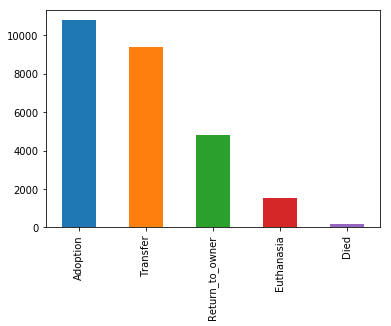

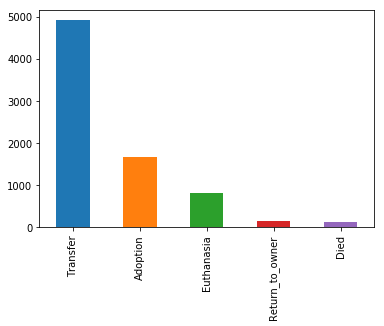

                 OutcomeType  percentage
Transfer                4909    0.639776
Adoption                1678    0.218689
Euthanasia               813    0.105956
Return_to_owner          153    0.019940
Died                     120    0.015639


In [11]:
#OutcomeType is the target variable we are trying to predict here. Lets analyse their values to get an idea.

train['OutcomeType'].value_counts().plot(kind='bar')

reasons_for_leaving = pd.DataFrame(train['OutcomeType'].value_counts())

reasons_for_leaving['percentage'] = reasons_for_leaving['OutcomeType'] / reasons_for_leaving['OutcomeType'].sum()

print(reasons_for_leaving)


plt.show()

#The options for leaving the shelter are below, with Adoption and return to owner being success and transfer moving to another shelter.
no_name_animals = train[train['Name'].isnull()]
no_name_animals.head()

no_name_animals['OutcomeType'].value_counts().plot(kind='bar')

plt.show()

reasons_for_leaving2 = pd.DataFrame(no_name_animals['OutcomeType'].value_counts())

reasons_for_leaving2['percentage'] = reasons_for_leaving2['OutcomeType'] / reasons_for_leaving2['OutcomeType'].sum()

print(reasons_for_leaving2)


#The above shows that an animal not having a name means it is much more likely to be transferred than the standard population.coming
#in at 62% vs the population of 35%.



In [12]:
#Analysing name? Why do so many animals have missing names? Does this impact the chances of rehoming? What should we do with
#The names when we want to use them for machine learning? What algorithms should we use?
#There is some clear signal in the missing names here. We should rename them to the same label to ensure we are capturing these.
#Dropping them would be 

print("The percentage of the animals with names is " + str(train['Name'].count() / train['AnimalID'].count()) + ". Dropping these would elimate a large number of our training data. We should impute them.")



The percentage of the animals with names is 0.712729314863. Dropping these would elimate a large number of our training data. We should impute them.


In [13]:
#Lets change the NaN names to a standard 'No Name'. We should do this for both training and test data sets.


train['Name'].fillna('No Name',inplace = True)
test['Name'].fillna('No Name', inplace = True)

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26710 entries, 0 to 26728
Data columns (total 9 columns):
AnimalID          26710 non-null object
Name              26710 non-null object
DateTime          26710 non-null object
OutcomeType       26710 non-null object
AnimalType        26710 non-null object
SexuponOutcome    26710 non-null object
AgeuponOutcome    26710 non-null object
Breed             26710 non-null object
Color             26710 non-null object
dtypes: object(9)
memory usage: 2.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11456 entries, 0 to 11455
Data columns (total 8 columns):
AnimalID          11456 non-null int64
Name              11456 non-null object
DateTime          11456 non-null object
AnimalType        11456 non-null object
SexuponOutcome    11456 non-null object
AgeuponOutcome    11456 non-null object
Breed             11456 non-null object
Color             11456 non-null object
dtypes: int64(1), object(7)
memory usage: 716.1+ KB


In [14]:
#Both datasets are not complete with information. Lets explore some of the other variables to check if they are sufficient.

train_cols_noID = ['Name','DateTime','AnimalType','SexuponOutcome','AgeuponOutcome','Breed','Color']

for x in train_cols_noID:
    print(train[x].value_counts())


No Name         7673
Max              136
Bella            135
Charlie          107
Daisy            106
Lucy              94
Buddy             87
Princess          86
Rocky             85
Luna              68
Jack              66
Lola              61
Sadie             58
Molly             57
Shadow            57
Coco              55
Maggie            55
Chico             54
Lily              53
Oreo              53
Blue              52
Lucky             51
Toby              50
Cookie            48
Ginger            48
Lady              47
Sam               46
Duke              45
Milo              44
Oliver            44
                ... 
Aden               1
Ceelo              1
Slider             1
Sputnik            1
Mitch Zuniga       1
Spartus            1
Moonshine          1
Laurn              1
Porches            1
Chica Loca         1
Laney              1
Daryl              1
Sledge             1
Little Ricky       1
Meechum            1
Mimzy              1
Annelise     

In [15]:
#The dates counts are interesting. 
#They are object types and some are down to the day, some hour and some minute. These look like they need resampling.

train['DateTime'] = pd.to_datetime(train['DateTime'])

train.info()

test['DateTime'] = pd.to_datetime(test['DateTime'])

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26710 entries, 0 to 26728
Data columns (total 9 columns):
AnimalID          26710 non-null object
Name              26710 non-null object
DateTime          26710 non-null datetime64[ns]
OutcomeType       26710 non-null object
AnimalType        26710 non-null object
SexuponOutcome    26710 non-null object
AgeuponOutcome    26710 non-null object
Breed             26710 non-null object
Color             26710 non-null object
dtypes: datetime64[ns](1), object(8)
memory usage: 2.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11456 entries, 0 to 11455
Data columns (total 8 columns):
AnimalID          11456 non-null int64
Name              11456 non-null object
DateTime          11456 non-null datetime64[ns]
AnimalType        11456 non-null object
SexuponOutcome    11456 non-null object
AgeuponOutcome    11456 non-null object
Breed             11456 non-null object
Color             11456 non-null object
dtypes: datetime64[ns](1), int

In [16]:
# functions to get new parameters from the column. #Function taken from another kernal.
#The below function turns each row into a string then tries to find a certain string. then returns male/female/neutered to create new features

def get_sex(x):
    x = str(x)
    if x.find('Male') >= 0: return 'male'
    if x.find('Female') >= 0: return 'female'
    return 'unknown'
def get_neutered(x):
    x = str(x)
    if x.find('Spayed') >= 0: return 'neutered'
    if x.find('Neutered') >= 0: return 'neutered'
    if x.find('Intact') >= 0: return 'intact'
    return 'unknown'

In [17]:
train['Sex'] = train.SexuponOutcome.apply(get_sex)
train['Neutered'] = train.SexuponOutcome.apply(get_neutered)
test['Sex'] = test.SexuponOutcome.apply(get_sex)
test['Neutered'] = test.SexuponOutcome.apply(get_neutered)



In [18]:
def get_mix(x):
    x = str(x)
    if x.find('Mix') >= 0: return 'mix'
    return 'not'
train['Mix'] = train.Breed.apply(get_mix)
test['Mix'] = test.Breed.apply(get_mix)

In [19]:
def calc_age_in_years(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age 
    if x.find('month')> -1: return age / 12.
    if x.find('week')> -1: return age / 52.
    if x.find('day')> -1: return age / 365.
    else: return 0

In [20]:
train['AgeInYears'] = train.AgeuponOutcome.apply(calc_age_in_years)
test['AgeInYears'] = test.AgeuponOutcome.apply(calc_age_in_years)

In [21]:
#Color - I am going to attempt to bin the colors, into a few core bins to keep memory space to a low but try and grab some signal.

def get_color(x):
    x = str(x)
    if x.find('Tabby') >= 0: return 'Tabby'
    if x.find('Black') >= 0: return 'Black'
    if x.find('White') >= 0: return 'White'
    return 'Other'

train['BasicColor'] = train.Color.apply(get_color)
test['BasicColor'] = test.Color.apply(get_color)

#For names I am going to bin them into two bins, named and not named. As seen through EDA this is a key feature, however including all
#names will increase memory by too much.

def get_name(x):
    x = str(x)
    if x.find('No Name') >= 0: return 'No Name'
    return 'Name'

train['Named'] = train.Name.apply(get_name)
test['Named'] = test.Name.apply(get_name)



In [22]:
#Lets import machine learning modules and start prepping for exploring different models.
#I need a classification algorithm which does multi class predictions.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [23]:
train.info()
test.info()

#Lets view the success of algorithms without using Breed and Color, as these two variables make the data set huge without cleaning them.

train = train.drop(['Color','Breed','AnimalID','DateTime','SexuponOutcome','AgeuponOutcome','Name',],axis=1)

#The test ID needs to be kept for later. To merge for submission

testID = test['AnimalID'] 

test = test.drop(['Color','Breed','AnimalID','DateTime','SexuponOutcome','AgeuponOutcome','Name'],axis=1)




<class 'pandas.core.frame.DataFrame'>
Int64Index: 26710 entries, 0 to 26728
Data columns (total 15 columns):
AnimalID          26710 non-null object
Name              26710 non-null object
DateTime          26710 non-null datetime64[ns]
OutcomeType       26710 non-null object
AnimalType        26710 non-null object
SexuponOutcome    26710 non-null object
AgeuponOutcome    26710 non-null object
Breed             26710 non-null object
Color             26710 non-null object
Sex               26710 non-null object
Neutered          26710 non-null object
Mix               26710 non-null object
AgeInYears        26710 non-null float64
BasicColor        26710 non-null object
Named             26710 non-null object
dtypes: datetime64[ns](1), float64(1), object(13)
memory usage: 3.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11456 entries, 0 to 11455
Data columns (total 14 columns):
AnimalID          11456 non-null int64
Name              11456 non-null object
DateTime          1145

In [24]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26710 entries, 0 to 26728
Data columns (total 8 columns):
OutcomeType    26710 non-null object
AnimalType     26710 non-null object
Sex            26710 non-null object
Neutered       26710 non-null object
Mix            26710 non-null object
AgeInYears     26710 non-null float64
BasicColor     26710 non-null object
Named          26710 non-null object
dtypes: float64(1), object(7)
memory usage: 1.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11456 entries, 0 to 11455
Data columns (total 7 columns):
AnimalType    11456 non-null object
Sex           11456 non-null object
Neutered      11456 non-null object
Mix           11456 non-null object
AgeInYears    11456 non-null float64
BasicColor    11456 non-null object
Named         11456 non-null object
dtypes: float64(1), object(6)
memory usage: 626.6+ KB


In [25]:
train_feat = train.drop('OutcomeType',axis = 1)
train_targ = train['OutcomeType']

train_feat = pd.get_dummies(train_feat,columns=['AnimalType','Sex','Neutered','Mix','BasicColor','Named'])
test_feat = pd.get_dummies(test,columns=['AnimalType','Sex','Neutered','Mix','BasicColor','Named'])




In [26]:
train_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26710 entries, 0 to 26728
Data columns (total 17 columns):
AgeInYears           26710 non-null float64
AnimalType_Cat       26710 non-null uint8
AnimalType_Dog       26710 non-null uint8
Sex_female           26710 non-null uint8
Sex_male             26710 non-null uint8
Sex_unknown          26710 non-null uint8
Neutered_intact      26710 non-null uint8
Neutered_neutered    26710 non-null uint8
Neutered_unknown     26710 non-null uint8
Mix_mix              26710 non-null uint8
Mix_not              26710 non-null uint8
BasicColor_Black     26710 non-null uint8
BasicColor_Other     26710 non-null uint8
BasicColor_Tabby     26710 non-null uint8
BasicColor_White     26710 non-null uint8
Named_Name           26710 non-null uint8
Named_No Name        26710 non-null uint8
dtypes: float64(1), uint8(16)
memory usage: 834.7 KB


In [27]:
x_train,x_test,y_train,y_test = train_test_split(train_feat,train_targ,random_state = 42, test_size=0.15,stratify=train_targ)

rf = RandomForestClassifier()

rf.fit(x_train,y_train)
predict = rf.predict_proba(x_test)

print(log_loss(y_test,predict))


1.90776767247


In [28]:
gb = GradientBoostingClassifier()

gb.fit(x_train,y_train)
predict2 = gb.predict_proba(x_test)

print(log_loss(y_test,predict2))

gb_cv = cross_val_score(gb,x_train,y_train,verbose=1,cv=5,scoring='neg_log_loss',n_jobs=3)

print(np.mean(gb_cv))

#Current log loss = 0.87 - This includes Age, Animal Type, Sex, Neutered, Mix
#Current log loss = 0.84 - This includes Age, Animal Type, Sex, Neutered, Mix,Basic Color, Named
#The addition of Color and Name boosted the results by a margin! Good Signal.


0.839458806563
-0.852016638512


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:   26.7s finished


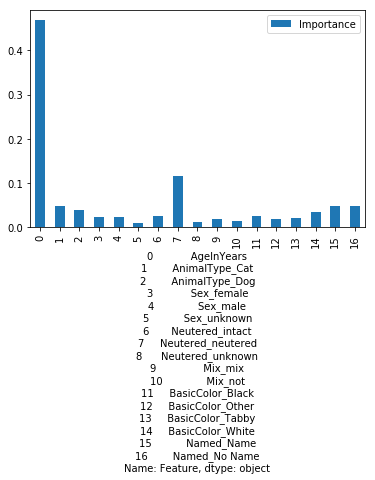

In [29]:
imports = pd.Series(gb.feature_importances_)
columns = pd.Series(x_train.columns)

importance = pd.DataFrame({'Importance': imports,'Feature': columns})

importance.plot(kind='bar')

plt.xlabel(importance['Feature'])
plt.show()

#Recommendations for the shelter? Ensure that animals are named as soon as they enter the shelter, this could help with adoption.
#If the animals are not neutered, get it done. This will increase their chances of adoption
#The following segments are for experimentation


In [33]:
NB = GaussianNB()

NB.fit(x_train,y_train)
predict3 = NB.predict_proba(x_test)

print(log_loss(y_test,predict3))

#Naive Bayes performs very poorly on this task.


5.62384415927


In [34]:
lr = LogisticRegression()

lr.fit(x_train,y_train)
predict4 = lr.predict_proba(x_test)

print(log_loss(y_test,predict4))

#Logreg doesnt perform very well.


0.920911775514


In [35]:
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [36]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier(objective = "multi:softprob",booster = "gbtree",learning_rate=0.05,colsample_bytree=0.8,subsample = 0.8, max_depth = 250,scale_pos_weight=1,n_estimators=200,num_class = 5,early_stopping_rounds=4)

xgb_model.fit(x_train,y_train)

pred_5 = xgb_model.predict_proba(x_test)

print(log_loss(y_test,pred_5))

xgb_cv = cross_val_score(xgb_model,x_train,y_train,verbose=2,cv=5,scoring='neg_log_loss',n_jobs=3)

print(np.mean(xgb_cv))

#Current log loss = 0.87 - This includes Age, Animal Type, Sex, Neutered, Mix

#Experimental test using xgboost. Didn't get the best results.

0.878403610136


[Parallel(n_jobs=3)]: Done   3 out of   5 | elapsed:  1.3min remaining:   53.0s


-0.910269450938


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  2.3min finished


# param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='neg_log_loss',n_jobs=4,iid=False, cv=5)

gsearch1.fit(x_train,y_train,eval_set=[(x_train, y_train), (x_test, y_test)], eval_metric='mlogloss', verbose=True)

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_